In [28]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('exams.csv')

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [31]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [32]:
#df_kmeans = df[['parental level of education','math score','reading score','writing score']]
df_kmeans = df[['math score','reading score','writing score']]

In [33]:
df_kmeans.head()

,math score,reading score,writing score
0,59,70,78
1,96,93,87
2,57,76,77
3,70,70,63
4,83,85,86


In [34]:
#parental_level_of_education_labels = {0:"some college",1:"associate's degree", 2:"some high school", 3:"bachelor's degree", 4:"master's degree", 5:"high school"}
#df_kmeans['parental level of education'] = df_kmeans['parental level of education'].map({"some college":0,"associate's degree":1, "some high school":2, "bachelor's degree": 3, "master's degree":4, "high school":5})

In [35]:
centers = range(1, 9)

In [36]:
clusters = [KMeans(n_clusters = center) for center in centers]

In [37]:
scores = [model.fit(df_kmeans).score(df_kmeans) for model in clusters]

c:\Users\Alejandro\Documents\5to Semestre\Repositorio Algortimica 2023\algoritmica-2023-1\alejandro hurtado\practice 4 kmeans\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Alejandro\Documents\5to Semestre\Repositorio Algortimica 2023\algoritmica-2023-1\alejandro hurtado\practice 4 kmeans\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Alejandro\Documents\5to Semestre\Repositorio Algortimica 2023\algoritmica-2023-1\alejandro hurtado\practice 4 kmeans\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

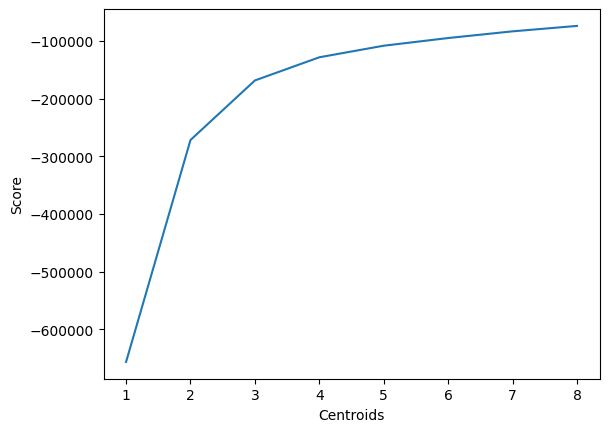

In [38]:
plt.plot(centers, scores)
plt.xlabel('Centroids')
plt.ylabel('Score')
plt.show()

In [39]:
k_means = KMeans(n_clusters = 4)

In [40]:
k_means.fit(df_kmeans)

c:\Users\Alejandro\Documents\5to Semestre\Repositorio Algortimica 2023\algoritmica-2023-1\alejandro hurtado\practice 4 kmeans\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [41]:
k_means.cluster_centers_


array([[45.31012658, 48.89873418, 46.32278481],
       [73.29376855, 75.35311573, 74.71810089],
       [86.38118812, 89.27227723, 88.75742574],
       [61.06270627, 63.4620462 , 61.75577558]])

In [45]:
students_groups = [
    'Estudiante con rendimiento insuficiente',
    'Estudiante con rendimiento aceptable',
    'Estudiante Sobresaliente',
    'Estudiante con bajo rendimiento'
]

In [51]:
math_test = 75
reading_test = 70
writing_test = 73
predicted = k_means.predict([[math_test, reading_test, writing_test]])

c:\Users\Alejandro\Documents\5to Semestre\Repositorio Algortimica 2023\algoritmica-2023-1\alejandro hurtado\practice 4 kmeans\kmeans_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [52]:
print(f'Un estudiante con {math_test} en el examen de matematicas, con {reading_test} en el examen de lectura, \n y con {writing_test} en el examen de escritura. Pertenece al grupo: {students_groups[predicted[0]]}')

Un estudiante con 75 en el examen de matematicas, con 70 en el examen de lectura, 
 y con 73 en el examen de escritura. Pertenece al grupo: Estudiante con rendimiento aceptable
